<a href="https://colab.research.google.com/github/kavi0697/Exploratory-data-analysis/blob/main/Exploratory_data_analysis(kavi_priya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as scp
sns.set(style="white", color_codes=True)

In [65]:
from google.colab import files
uploaded = files.upload()


Saving hepatitis_csv.csv to hepatitis_csv (3).csv


In [ ]:
hepatitis_data = pd.read_csv("hepatitis_csv.csv")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import precision_recall_curve, confusion_matrix

from sklearn.impute import SimpleImputer

In [ ]:
hepatitis_data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [ ]:
hepatitis_data.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [ ]:
hepatitis_dataa = hepatitis_data.astype(float)
hepatitis_dataa

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0.0,1.0
1,50.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0.0,1.0
2,78.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0.0,1.0
3,31.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0.0,1.0
4,34.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,1.0,0.0
151,44.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.9,126.0,142.0,4.3,NaN,1.0,1.0
152,61.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,75.0,20.0,4.1,NaN,1.0,1.0
153,53.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.5,81.0,19.0,4.1,48.0,1.0,1.0


In [ ]:
hepatitis_dataa.dtypes

age                float64
sex                float64
steroid            float64
antivirals         float64
fatigue            float64
malaise            float64
anorexia           float64
liver_big          float64
liver_firm         float64
spleen_palpable    float64
spiders            float64
ascites            float64
varices            float64
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology          float64
class              float64
dtype: object

In [ ]:
total_of_patients = hepatitis_data.shape[0]
total_of_live_patients = (np.sum(hepatitis_data['class'] == 1)/total_of_patients)*100
total_of_dead_patients = (np.sum(hepatitis_data['class'] == 0)/total_of_patients)*100
print("Living patients:", round(total_of_live_patients,2),"%")
print("Dead patients:", round(total_of_dead_patients,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


In [ ]:
replacements = {'no': 0,
               'yes': 1,
               'DIE': 0,
               'LIVE': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

hepatitis_data.replace(replacements, inplace = True)


In [ ]:
hepatitis_data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [ ]:
x = hepatitis_data.iloc[:, hepatitis_data.columns != 'class']
y = hepatitis_data.iloc[:, hepatitis_data.columns == 'class']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


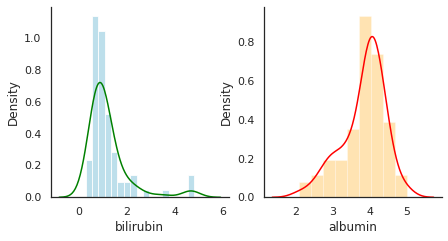

In [ ]:
plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['bilirubin'],
             kde_kws={"color":"green","lw":1.5,"alpha":0.8},
             hist_kws={"color":"lightblue","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"orange","alpha":0.3})
sns.despine();


In [ ]:
hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


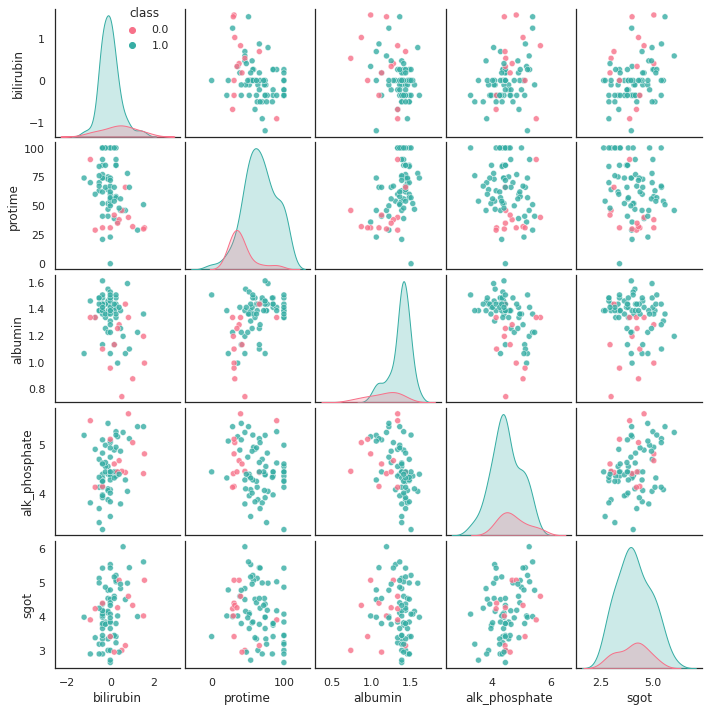

In [ ]:
g = sns.pairplot(hepatitis_analysis, x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; y

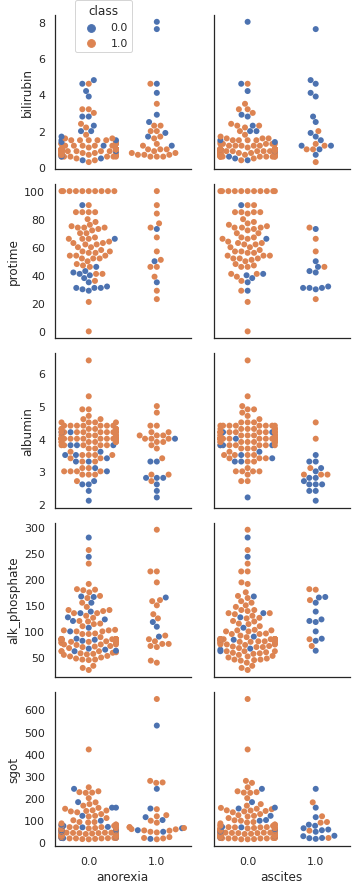

In [ ]:
graph = sns.PairGrid(hepatitis_data,
                 x_vars=["anorexia", "ascites"],
                 y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'],
                 hue = 'class')
graph.map(sns.swarmplot, s = 6)
graph.add_legend(frameon=True, bbox_to_anchor=(0.33, 0.96));

In [ ]:
hepatitis_data[categorical_variables] = hepatitis_data[categorical_variables].apply(lambda x : pd.factorize(x)[0])

In [ ]:
corr = hepatitis_data.dropna().corr(method = 'pearson')

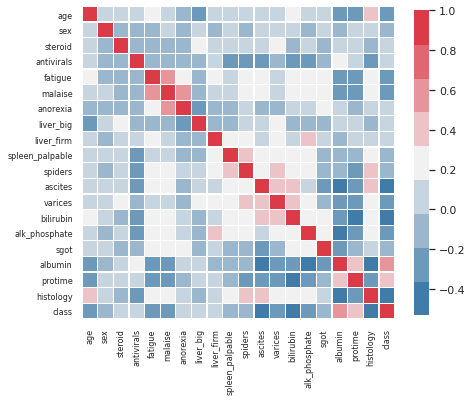

In [ ]:
plt.figure(figsize=(7, 7))
cmap = sns.diverging_palette(240, 10, n=9, center = 'light')
sns.heatmap(corr, linewidths=.2, cmap = cmap, cbar_kws={"shrink": .8}, square=True, xticklabels=True, yticklabels=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);